In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.armax_model import ARMAXModel
from seminartools.data import read_merged
import numpy as np

# 1. Read data

In [90]:
df_inflation = read_inflation(mergeable_format=True).reset_index()
df_exog = read_merged().reset_index()
df_exog

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [91]:
#rename columns st armax model can take the inflation data
df_inflation = df_inflation.rename(columns = {"Country": "country", "yearmonth": "date"})

# 2. AR model per country

In [92]:
modelARMA = ARMAXModel()
exogenous_vars = ["gdp_growth", "interest_rate", "unemployment_rate", "commodity_CRUDE_PETRO", "commodity_iNATGAS", "commodity_iAGRICULTURE", "commodity_iMETMIN", "commodity_iPRECIOUSMET"]
modelARMAX = ARMAXModel(exogenous_columns = exogenous_vars)

In [95]:
countries = (df_exog["country"].unique())
countries

array(['Japan', 'Canada', 'United States', 'Australia', 'New Zealand',
       'Switzerland', 'Italy', 'France', 'Portugal', 'Spain', 'Sweden',
       'Denmark', 'United Kingdom', 'Germany', 'Netherlands', 'Norway',
       'Belgium', 'Korea', 'South Africa', 'Türkiye'], dtype=object)

In [96]:
df_exog

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [97]:
df_inflation

,country,date,inflation
0,Portugal,1970-04-01,0.000000
1,New Zealand,1970-04-01,0.015421
2,Dominican Republic,1970-04-01,-0.001604
3,Finland,1970-04-01,0.008333
4,Ireland,1970-04-01,0.029871
...,...,...,...
7415,Canada,2023-01-01,0.006080
7416,Sweden,2023-01-01,0.014955
7417,Korea,2023-01-01,0.010538
7418,United Kingdom,2023-01-01,0.008814


In [103]:
from warnings import filterwarnings

select = df_exog.country.apply(lambda x : x in countries)
dfExogtoUse = df_exog[select].copy()

filterwarnings('ignore')
modelARMA.fit(df_inflation.copy())
modelARMAX.fit(dfExogtoUse.copy())

In [104]:
for country, order in modelARMA.orders.items():
    print(f"Order for {country}: {order}")

Order for Portugal: (2, 1)
Order for New Zealand: (3, 2)
Order for Dominican Republic: (3, 2)
Order for Finland: (3, 2)
Order for Ireland: (3, 3)
Order for Austria: (2, 3)
Order for Japan: (2, 2)
Order for South Africa: (3, 3)
Order for Korea: (2, 3)
Order for Fiji: (3, 3)
Order for Paraguay: (3, 3)
Order for Malaysia: (2, 2)
Order for Sweden: (2, 2)
Order for Switzerland: (3, 3)
Order for Thailand: (2, 3)
Order for Cyprus: (3, 3)
Order for Mauritius: (3, 3)
Order for Greece: (2, 3)
Order for France: (2, 3)
Order for Denmark: (2, 3)
Order for Netherlands: (3, 3)
Order for Türkiye: (2, 3)
Order for Singapore: (2, 1)
Order for Germany: (3, 3)
Order for Luxembourg: (2, 3)
Order for Guatemala: (1, 3)
Order for Norway: (2, 2)
Order for Belgium: (2, 2)
Order for United States: (1, 3)
Order for Canada: (3, 3)
Order for Italy: (1, 1)
Order for United Kingdom: (3, 2)
Order for Australia: (1, 1)
Order for Spain: (2, 2)
Order for Philippines: (3, 3)


In [105]:
for country, order in modelARMAX.orders.items():
    print(f"Order for {country}: {order}")

Order for Japan: (2, 2)
Order for Canada: (3, 3)
Order for United States: (3, 3)
Order for Australia: (1, 1)
Order for New Zealand: (1, 1)
Order for Switzerland: (3, 3)
Order for Italy: (3, 2)
Order for France: (1, 2)
Order for Portugal: (1, 2)
Order for Spain: (2, 1)
Order for Sweden: (2, 1)
Order for Denmark: (3, 3)
Order for United Kingdom: (1, 2)
Order for Germany: (3, 3)
Order for Netherlands: (3, 2)
Order for Norway: (2, 2)
Order for Belgium: (3, 2)
Order for Korea: (3, 3)
Order for South Africa: (3, 3)
Order for Türkiye: (3, 3)


In [106]:
modelARMA.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -224.339
Date:                Wed, 03 Apr 2024   AIC                            464.678
Time:                        17:57:48   BIC                            491.530
Sample:                    06-30-1970   HQIC                           475.531
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0852      0.353      0.241      0.809      -0.607       0.778
ar.L1         -0.4951      0.188     -2.630      0.009      -0.864      -0.126
ar.L2          0.9156      0.045     20.533      0.000       0.828       1.003
ar.L3          0.4412      0.159      2.780      0.005       0.130       0.752
ma.L1          0.9104      0.187      4.865      0.000       0.544       1.277
ma.L2         -0.4697      0.143     -3.295      0.001      -0.749      -0.190
ma.L3         -0.5091      0.077     -6.605      0.000      -0.660      -0.358
sigma2         0.4813      0.032     15.223      0.000       0.419       0.543
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               172.25
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [107]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -67.166
Date:                Wed, 03 Apr 2024   AIC                            166.333
Time:                        17:57:53   BIC                            201.608
Sample:                    06-30-1996   HQIC                           180.291
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0018      0.161      0.011      0.991      -0.313       0.317
gdp_growth                 0.1877      0.201      0.935      0.350      -0.206       0.581
interest_rate              0.0712      0.202      0.352      0.725      -0.325       0.467
unemployment_rate         -0.2763      0.206     -1.340      0.180      -0.680       0.128
commodity_CRUDE_PETRO      0.2931      0.135      2.177      0.029       0.029       0.557
commodity_iNATGAS         -0.0901      0.135     -0.666      0.506      -0.355       0.175
commodity_iAGRICULTURE     0.0595      0.143      0.417      0.676      -0.220       0.339
commodity_iMETMIN         -0.3509      0.154     -2.272      0.023      -0.654      -0.048
commodity_iPRECIOUSMET     0.0228      0.134      0.171      0.864      -0.239       0.284
ar.L1                      0.8316      0.061     13.554      0.000       0.711       0.952
ar.L2                      0.8761      0.051     17.063      0.000       0.775       0.977
ar.L3                     -0.9529      0.052    -18.469      0.000      -1.054      -0.852
ma.L1                     -0.7864      0.561     -1.402      0.161      -1.885       0.313
ma.L2                     -0.7662      0.439     -1.746      0.081      -1.626       0.094
ma.L3                      0.9724      0.730      1.331      0.183      -0.459       2.404
sigma2                     0.3894      0.269      1.447      0.148      -0.138       0.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.98   Prob(JB):                         0.64
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Evaluation

In [108]:
df_inflation["country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea', 'Fiji',
       'Paraguay', 'Malaysia', 'Sweden', 'Switzerland', 'Thailand',
       'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Türkiye', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

,date,country,inflation
0,2023-04-01,Portugal,0.018730
1,2023-04-01,New Zealand,0.011596
2,2023-04-01,Dominican Republic,0.019561
3,2023-04-01,Finland,0.017313
4,2023-04-01,Ireland,0.019610
5,2023-04-01,Austria,0.020331
6,2023-04-01,Japan,0.008358
7,2023-04-01,South Africa,0.014594
8,2023-04-01,Korea,0.008416
9,2023-04-01,Fiji,0.008933


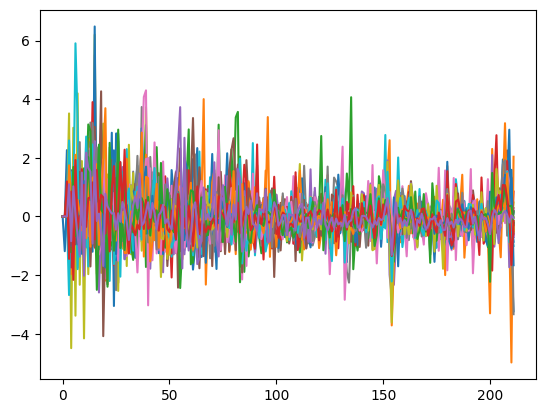

In [109]:
modelARMA.predict(df_inflation)

,date,country,inflation
0,2023-04-01,Japan,-0.003042
1,2023-04-01,Canada,0.008723
2,2023-04-01,United States,0.018490
3,2023-04-01,Australia,0.012445
4,2023-04-01,New Zealand,0.013181
5,2023-04-01,Switzerland,0.017524
6,2023-04-01,Italy,0.029220
7,2023-04-01,France,0.011008
8,2023-04-01,Portugal,0.017281
9,2023-04-01,Spain,0.009418


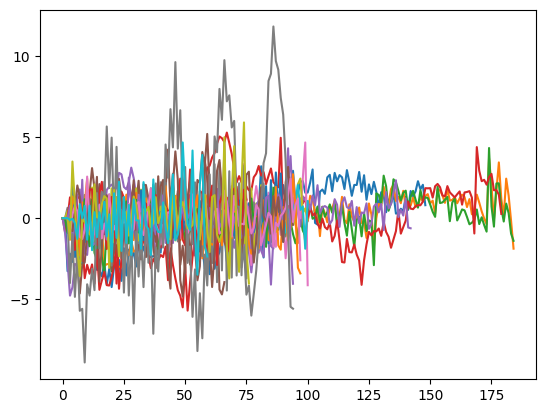

In [110]:
modelARMAX.predict(dfExogtoUse)

# 3.2. Try to make ARMA forecasts

In [111]:
data = dfExogtoUse[dfExogtoUse["country"] == "Switzerland"]
data

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
338,Switzerland,1996-04-01,0.000000,-0.263939,1.500000,3.7,-0.045704,-0.094999,0.030666,-0.088572,-0.034433
362,Switzerland,1997-04-01,-0.001095,0.259949,1.000000,4.1,-0.072944,0.083561,-0.035117,-0.000766,-0.036033
392,Switzerland,1998-04-01,0.000000,1.103934,1.000000,3.6,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
441,Switzerland,1999-04-01,0.002183,0.649858,0.500000,3.1,0.245063,0.185604,-0.026673,0.062249,-0.073526
483,Switzerland,2000-04-01,0.003226,0.462961,3.166667,2.7,0.077511,0.349167,-0.017252,-0.038788,0.002451
...,...,...,...,...,...,...,...,...,...,...,...
2087,Switzerland,2022-01-01,0.007859,-0.061851,-0.750000,4.6,0.542498,0.146272,0.163679,0.210497,0.093645
2106,Switzerland,2022-04-01,0.015595,0.980040,-0.583333,4.1,0.039177,-0.028903,-0.029440,-0.181045,-0.072004
2133,Switzerland,2022-07-01,0.006718,0.245316,0.000000,4.3,-0.244692,0.486523,-0.088860,-0.154988,-0.090042
2145,Switzerland,2022-10-01,-0.000791,-0.026666,0.666667,4.1,-0.115091,-0.355721,-0.016280,0.100554,0.093372


In [112]:
mdl = modelARMAX.models["Switzerland"]
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -67.166
Date:                Wed, 03 Apr 2024   AIC                            166.333
Time:                        17:58:09   BIC                            201.608
Sample:                    06-30-1996   HQIC                           180.291
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0018      0.161      0.011      0.991      -0.313       0.317
gdp_growth                 0.1877      0.201      0.935      0.350      -0.206       0.581
interest_rate              0.0712      0.202      0.352      0.725      -0.325       0.467
unemployment_rate         -0.2763      0.206     -1.340      0.180      -0.680       0.128
commodity_CRUDE_PETRO      0.2931      0.135      2.177      0.029       0.029       0.557
commodity_iNATGAS         -0.0901      0.135     -0.666      0.506      -0.355       0.175
commodity_iAGRICULTURE     0.0595      0.143      0.417      0.676      -0.220       0.339
commodity_iMETMIN         -0.3509      0.154     -2.272      0.023      -0.654      -0.048
commodity_iPRECIOUSMET     0.0228      0.134      0.171      0.864      -0.239       0.284
ar.L1                      0.8316      0.061     13.554      0.000       0.711       0.952
ar.L2                      0.8761      0.051     17.063      0.000       0.775       0.977
ar.L3                     -0.9529      0.052    -18.469      0.000      -1.054      -0.852
ma.L1                     -0.7864      0.561     -1.402      0.161      -1.885       0.313
ma.L2                     -0.7662      0.439     -1.746      0.081      -1.626       0.094
ma.L3                      0.9724      0.730      1.331      0.183      -0.459       2.404
sigma2                     0.3894      0.269      1.447      0.148      -0.138       0.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.98   Prob(JB):                         0.64
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

-1.9472486547429106

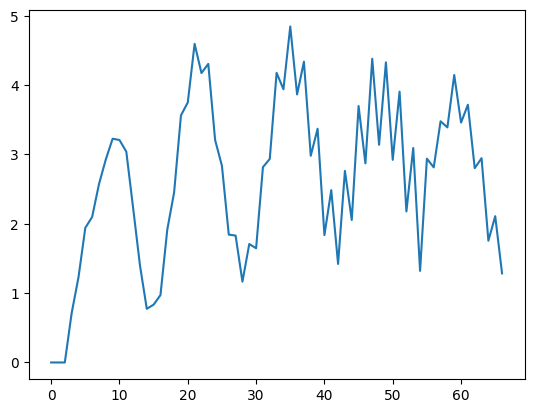

In [113]:
hi = modelARMAX._predict_country(data, "Switzerland")
hi

# 4. H-period ahead forecasting

In [114]:
df_inflation

,country,date,inflation
0,Portugal,1970-04-01,0.000000
1,New Zealand,1970-04-01,0.015421
2,Dominican Republic,1970-04-01,-0.001604
3,Finland,1970-04-01,0.008333
4,Ireland,1970-04-01,0.029871
...,...,...,...
7415,Canada,2023-01-01,0.006080
7416,Sweden,2023-01-01,0.014955
7417,Korea,2023-01-01,0.010538
7418,United Kingdom,2023-01-01,0.008814


,date,country,inflation
0,2020-01-01,Japan,-0.003030
1,2020-01-01,Canada,0.003923
2,2020-01-01,United States,0.007749
3,2020-01-01,Australia,-0.007645
4,2020-01-01,New Zealand,0.002241
...,...,...,...
255,2023-01-01,Norway,0.009728
256,2023-01-01,Belgium,0.013983
257,2023-01-01,Korea,0.042361
258,2023-01-01,South Africa,0.042668


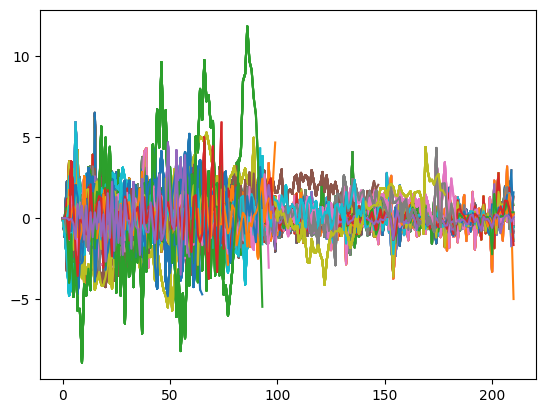

In [115]:
from seminartools.models.utils import h_period_ahead_forecast

forecastARMA = h_period_ahead_forecast(modelARMA, df_inflation.copy(), "2020-01-01", h=1)
forecastARMAX = h_period_ahead_forecast(modelARMAX, dfExogtoUse.copy(), "2020-01-01", h=1)

forecastARMAX

2020-01-01 00:00:00


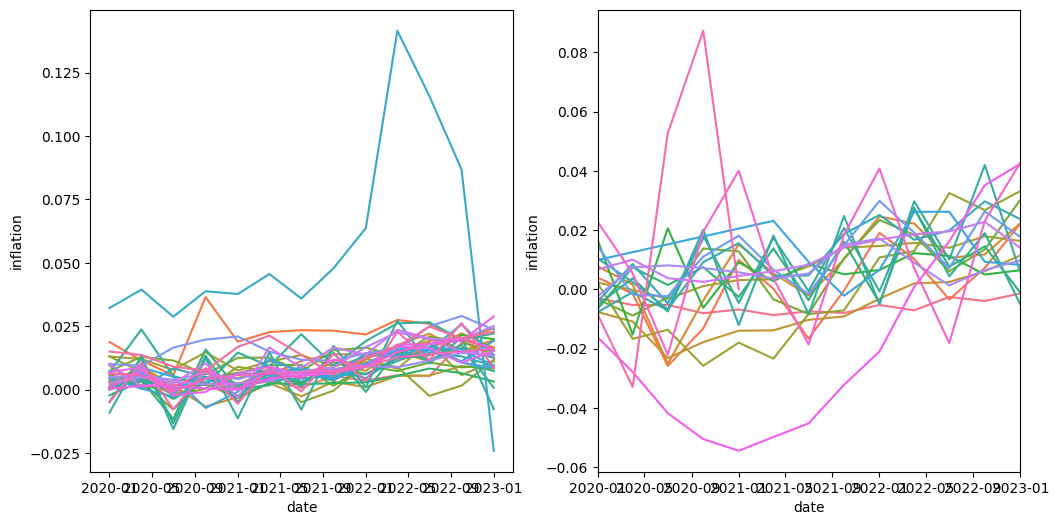

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.lineplot(
    data = forecastARMA,
    x = "date",
    y = "inflation",
    hue = "country",
    ax = axes[0]
)
sns.lineplot(
    data = forecastARMAX,
    x = "date",
    y = "inflation",
    hue = "country",
    ax = axes[1]
)
print(forecastARMAX['date'].min())
axes[1].set_xlim(forecastARMA['date'].min(), forecastARMAX['date'].max())
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()


In [117]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 -67.166
Date:                Wed, 03 Apr 2024   AIC                            166.333
Time:                        17:59:58   BIC                            201.608
Sample:                    06-30-1996   HQIC                           180.291
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0018      0.161      0.011      0.991      -0.313       0.317
gdp_growth                 0.1877      0.201      0.935      0.350      -0.206       0.581
interest_rate              0.0712      0.202      0.352      0.725      -0.325       0.467
unemployment_rate         -0.2763      0.206     -1.340      0.180      -0.680       0.128
commodity_CRUDE_PETRO      0.2931      0.135      2.177      0.029       0.029       0.557
commodity_iNATGAS         -0.0901      0.135     -0.666      0.506      -0.355       0.175
commodity_iAGRICULTURE     0.0595      0.143      0.417      0.676      -0.220       0.339
commodity_iMETMIN         -0.3509      0.154     -2.272      0.023      -0.654      -0.048
commodity_iPRECIOUSMET     0.0228      0.134      0.171      0.864      -0.239       0.284
ar.L1                      0.8316      0.061     13.554      0.000       0.711       0.952
ar.L2                      0.8761      0.051     17.063      0.000       0.775       0.977
ar.L3                     -0.9529      0.052    -18.469      0.000      -1.054      -0.852
ma.L1                     -0.7864      0.561     -1.402      0.161      -1.885       0.313
ma.L2                     -0.7662      0.439     -1.746      0.081      -1.626       0.094
ma.L3                      0.9724      0.730      1.331      0.183      -0.459       2.404
sigma2                     0.3894      0.269      1.447      0.148      -0.138       0.917
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.98   Prob(JB):                         0.64
Heteroskedasticity (H):               0.81   Skew:                            -0.27
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. Compare the forecast with the actual data

In [118]:
forecast_mergedARMA = forecastARMA.copy().rename(columns={"inflation": "pred", "date": "date", "country": "country"})
df_inflation = read_inflation(mergeable_format=True).reset_index()
forecast_mergedARMA = forecast_mergedARMA.merge(
    df_inflation[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMA.tail(100)


,date,country,pred,actual
355,2022-07-01,Austria,0.016038,0.026846
356,2022-07-01,Japan,0.005557,0.010628
357,2022-07-01,South Africa,0.011237,0.027957
358,2022-07-01,Korea,0.018638,0.011352
359,2022-07-01,Fiji,-0.002466,0.007368
...,...,...,...,...
450,2023-01-01,Italy,0.028844,0.003938
451,2023-01-01,United Kingdom,0.015904,0.008814
452,2023-01-01,Australia,0.016025,0.013756
453,2023-01-01,Spain,0.008547,0.006013


In [119]:
dfExogtoUse

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [120]:
forecastARMAX

,date,country,inflation
0,2020-01-01,Japan,-0.003030
1,2020-01-01,Canada,0.003923
2,2020-01-01,United States,0.007749
3,2020-01-01,Australia,-0.007645
4,2020-01-01,New Zealand,0.002241
...,...,...,...
255,2023-01-01,Norway,0.009728
256,2023-01-01,Belgium,0.013983
257,2023-01-01,Korea,0.042361
258,2023-01-01,South Africa,0.042668


In [123]:
forecast_mergedARMAX = forecastARMAX.copy().rename(columns={"inflation": "pred"})
dfExogtoUse = dfExogtoUse.rename(columns = { "yearmonth": "date", "Country": "country"})
forecast_mergedARMAX = forecast_mergedARMAX.merge(
    dfExogtoUse[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMAX.tail(100)

,date,country,pred,actual
160,2022-01-01,Japan,-0.005298,0.006876
161,2022-01-01,Canada,0.019072,0.020211
162,2022-01-01,United States,0.024599,0.022835
163,2022-01-01,Australia,-0.003148,0.021295
164,2022-01-01,New Zealand,0.014619,0.017820
...,...,...,...,...
255,2023-01-01,Norway,0.009728,0.006886
256,2023-01-01,Belgium,0.013983,-0.003628
257,2023-01-01,Korea,0.042361,0.010538
258,2023-01-01,South Africa,0.042668,0.011202


In [124]:
#drop those rows for which the actual inflation data is missing
forecast_mergedARMAX.dropna(inplace=True)
forecast_mergedARMA.dropna(inplace = True)

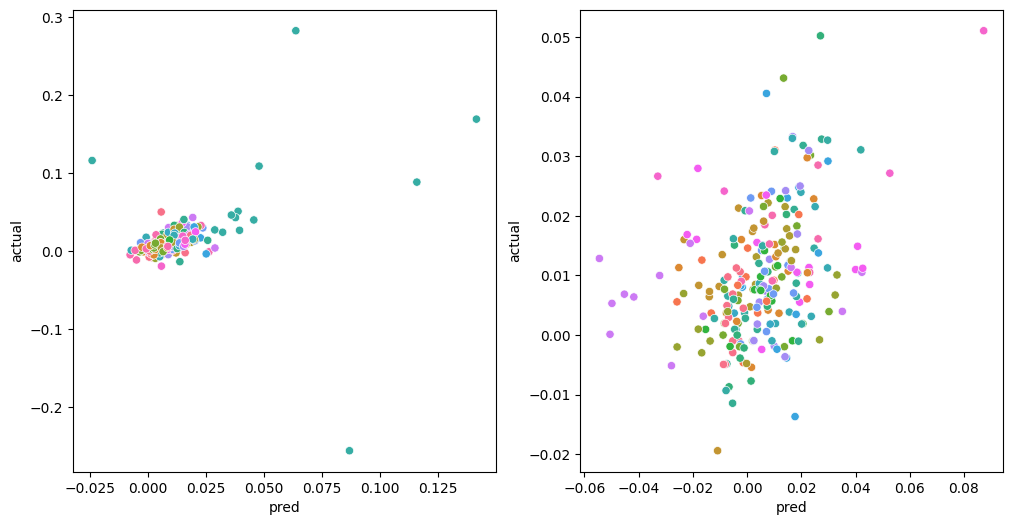

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.scatterplot(
    data = forecast_mergedARMA,
    x = "pred",
    y = "actual",
    hue = "country",
    ax=axes[0],
)
sns.scatterplot(
    data = forecast_mergedARMAX,
    x = "pred",
    y = "actual",
    hue = "country",
    ax = axes[1],
)
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()

In [126]:
import statsmodels.api as sm
#for the ARMA model

sm.OLS(
    forecast_mergedARMA["actual"], sm.add_constant(forecast_mergedARMA["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     31.45
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           5.26e-08
Time:                        18:03:25   Log-Likelihood:                 560.41
No. Observations:                 260   AIC:                            -1117.
Df Residuals:                     258   BIC:                            -1110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.002      2.640      0.009       0.001       0.010
pred           0.6612      0.118      5.608      0.000       0.429       0.893
==============================================================================
Omnibus:                      252.173   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74637.220
Skew:                          -2.931   Prob(JB):                         0.00
Kurtosis:                      85.796   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
#for the ARMAX model
sm.OLS(
    forecast_mergedARMAX["actual"], sm.add_constant(forecast_mergedARMAX["pred"])
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     39.00
Date:                Wed, 03 Apr 2024   Prob (F-statistic):           1.98e-09
Time:                        18:03:34   Log-Likelihood:                 752.31
No. Observations:                 236   AIC:                            -1501.
Df Residuals:                     234   BIC:                            -1494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.001     13.202      0.000       0.008       0.010
pred           0.2361      0.038      6.245      0.000       0.162       0.311
==============================================================================
Omnibus:                       12.073   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.578
Skew:                           0.505   Prob(JB):                      0.00186
Kurtosis:                       3.510   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
#take only those countries for the arma model that are also in armax model to get a good comparison
mask = forecast_mergedARMA.country.apply(lambda x : x in countries)
forecast_mergedARMA = forecast_mergedARMA[mask]
forecast_mergedARMA

,date,country,pred,actual
0,2020-01-01,Portugal,0.002040,-0.008679
1,2020-01-01,New Zealand,0.006337,0.007664
6,2020-01-01,Japan,0.001034,-0.000978
7,2020-01-01,South Africa,0.013064,0.011336
8,2020-01-01,Korea,0.009538,0.003167
...,...,...,...,...
449,2023-01-01,Canada,0.015271,0.006080
450,2023-01-01,Italy,0.028844,0.003938
451,2023-01-01,United Kingdom,0.015904,0.008814
452,2023-01-01,Australia,0.016025,0.013756


In [129]:
#mspes
E = forecast_mergedARMAX.pred - forecast_mergedARMAX.actual
SPE = E**2
SSPE= sum(SPE)
MSPE = SSPE/len(forecast_mergedARMA)
MSPE_arma = np.sum((forecast_mergedARMA.pred - forecast_mergedARMA.actual)**2)/len(forecast_mergedARMA)
MSPE_armaX = np.sum((forecast_mergedARMAX.pred - forecast_mergedARMAX.actual)**2)/len(forecast_mergedARMAX)
print("MSPE of ARMA model is: " + str(MSPE_arma))
print("MSPE of ARMAX model is: " + str(MSPE_armaX))

MSPE of ARMA model is: 0.0008156041535924332
MSPE of ARMAX model is: 0.00029912589266065846


(array([ 2.,  4.,  6.,  8., 27., 61., 78., 28., 14.,  8.]),
 array([-0.06735196, -0.05699114, -0.04663031, -0.03626948, -0.02590866,
        -0.01554783, -0.005187  ,  0.00517382,  0.01553465,  0.02589548,
         0.0362563 ]),
 <BarContainer object of 10 artists>)

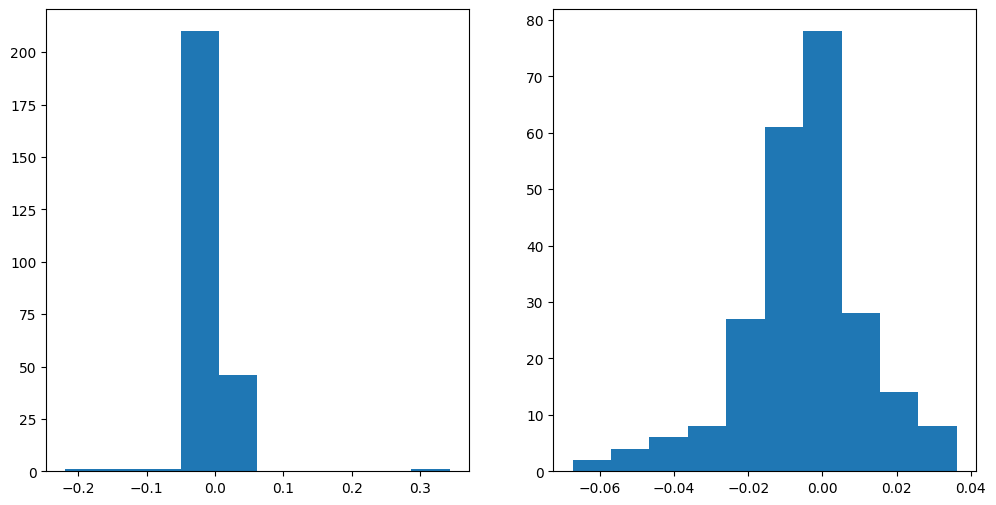

In [132]:
E_ARMAX = forecast_mergedARMAX.pred - forecast_mergedARMAX.actual
E_ARMA = forecast_mergedARMA.pred - forecast_mergedARMA.actual
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
axes[0].hist(
    x = E_ARMA,
    bins = 10,
)
axes[1].hist(
    x = E_ARMAX,
    bins = 10,
)

